In [2]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))

from evaluation.evaluation_harness import OnlineEvaluator, include_coldstart, include_all, score_time_spent, score_constant
from pprint import pprint
import pandas as pd

%load_ext autoreload
%autoreload 2

In [3]:
evaluator = OnlineEvaluator(include_all, score_constant)
all_metrics = []
def run_eval(model_name, model_save_path):
    evaluator.reset(model_name, model_save_path)
    evaluator.plot_top_N_hit_percentage_percentiles(10)
    evaluator.compute_top_N_hit_percentage(10)
    evaluator.plot_top_N_hit_percentage_percentiles(50)
    evaluator.compute_top_N_hit_percentage(50)
    evaluator.plot_user_rank_roc_curve()
    evaluator.compute_user_rank_auc_roc()
    # evaluator.save_metrics('test_online_evaluator', overwrite=True)
    pprint(evaluator.metrics)
    all_metrics.append({'model_name': model_name, 'model_save_path': model_save_path, **evaluator.metrics})
    print()

common_neighbors evaluation_test_common_neighbors
{'top_10_hit_percentage': 0.6111111111111112,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_50_hit_percentage': 0.5,
 'top_50_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_rank_auc_roc': 0.6025,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

common_neighbors evaluation_test_common_neighbors_percentile_scoring
Not enough samples to get percentile figure.
Not enough samples to get percentile figure.
{'top_10_hit_percentage': 0.2222222222222222,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.35,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': 0.31868131868131866,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

common_neighbors test_common_neighbors_default
{'top_10_hit_percentage': 0.4117647058823529,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640

c:\Users\akash\Desktop\School\CS 3892\ml-projects-project\evaluation\..\evaluation\evaluation_harness.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axis = plt.subplots()
c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

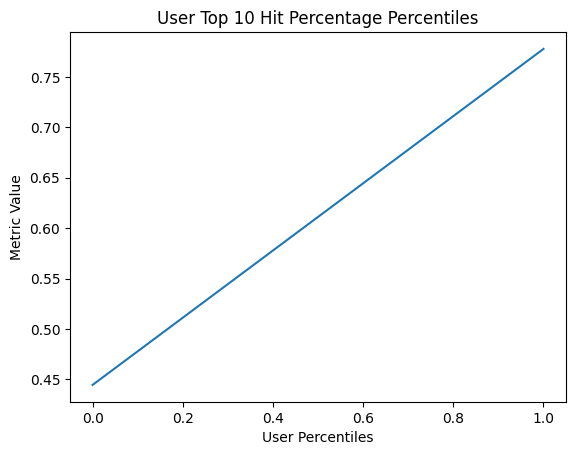

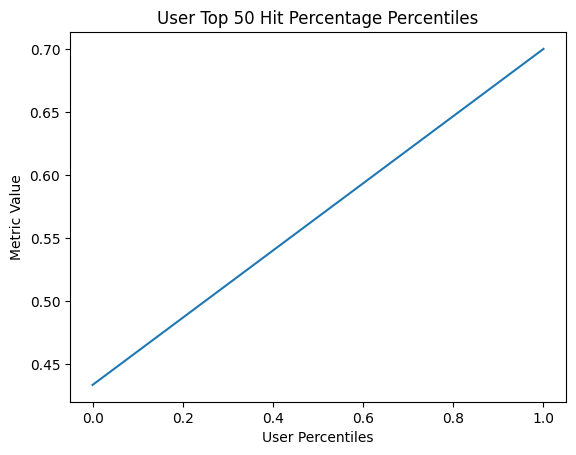

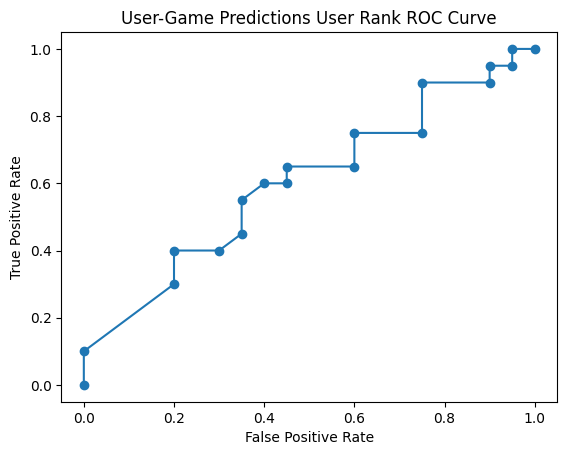

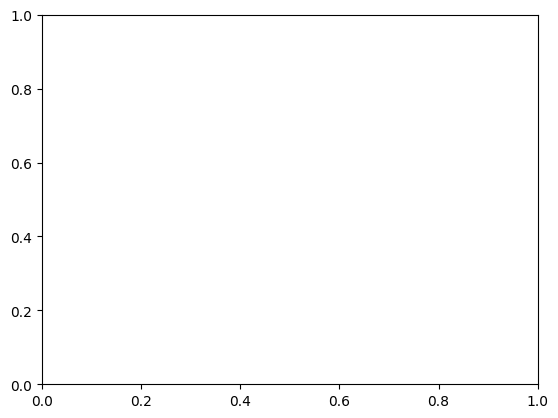

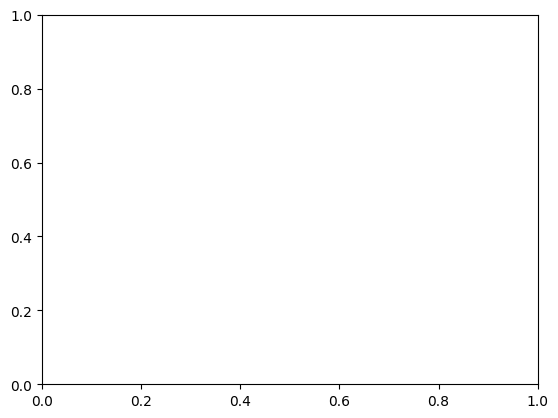

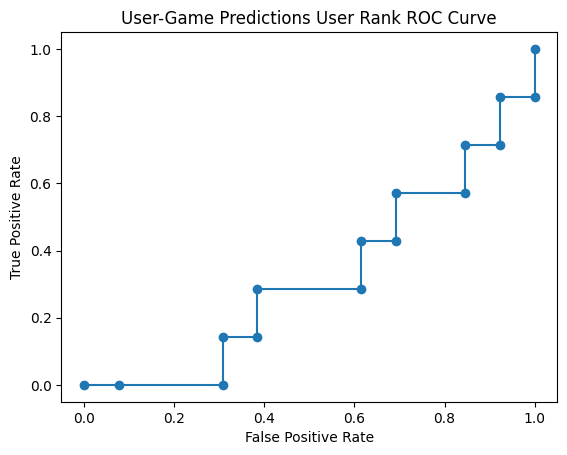

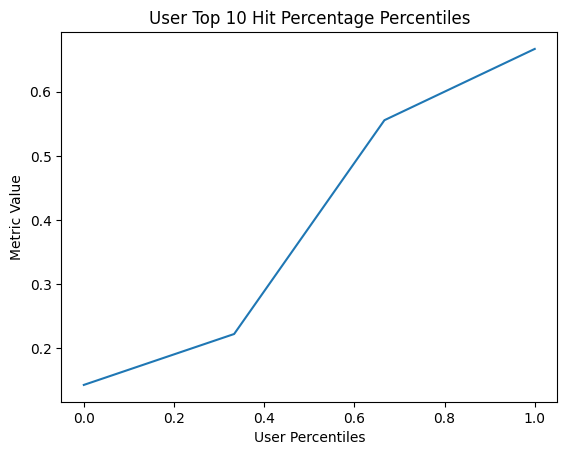

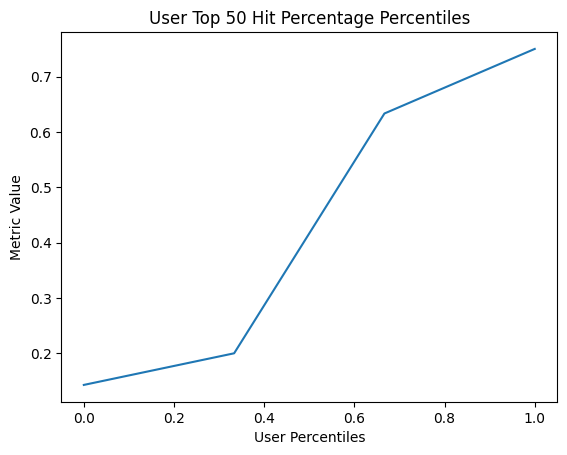

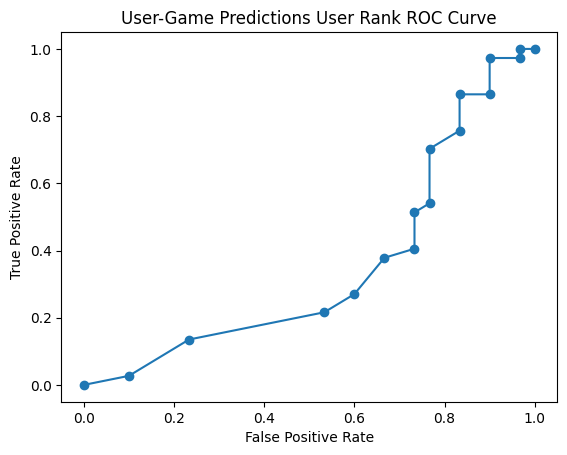

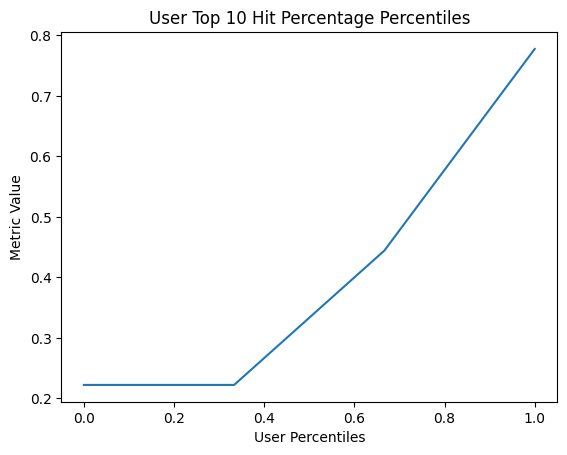

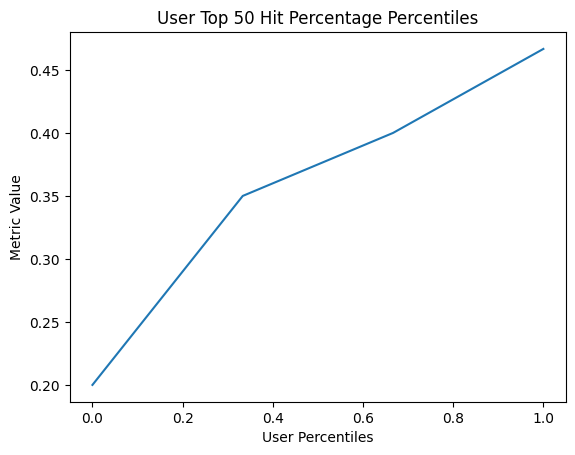

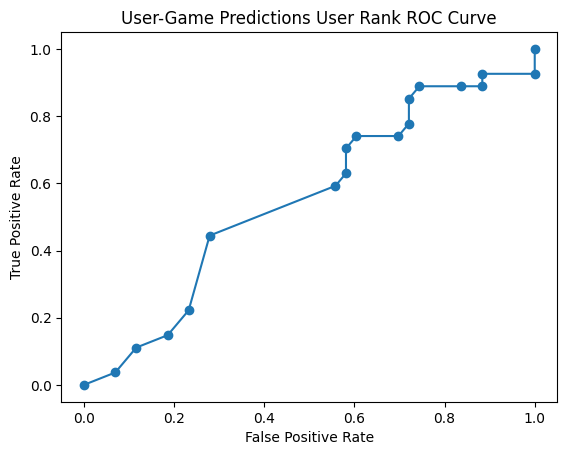

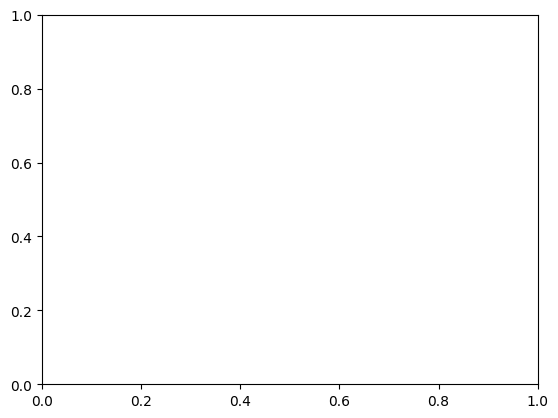

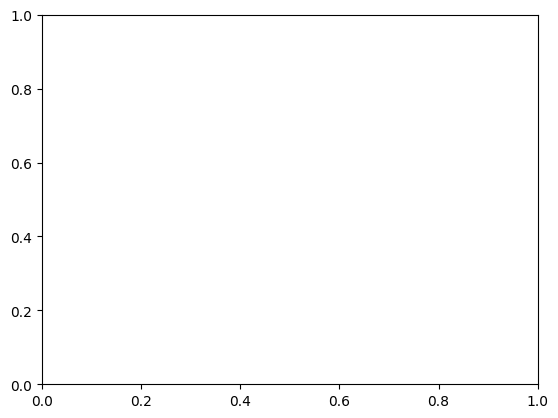

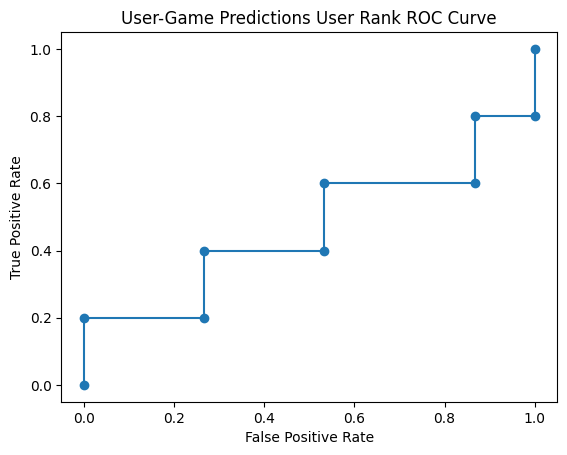

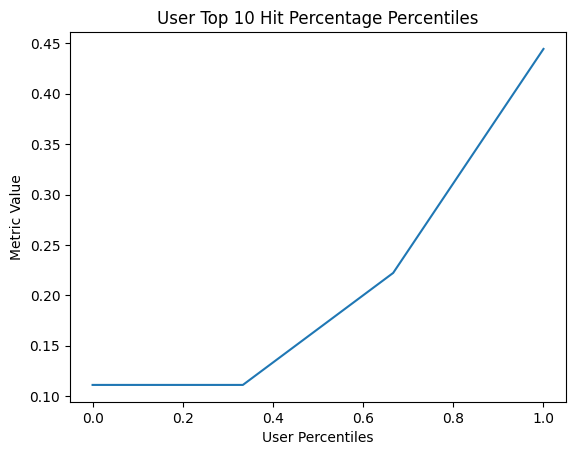

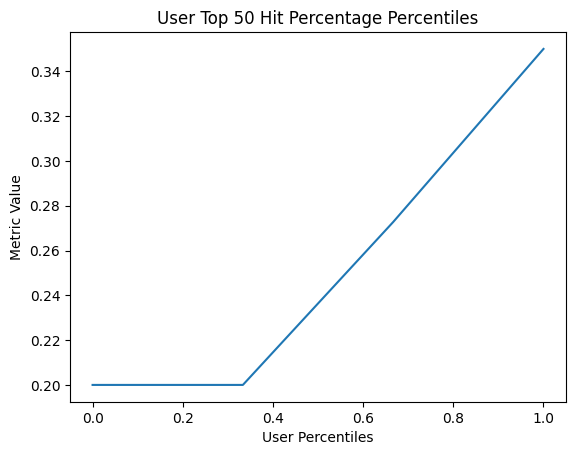

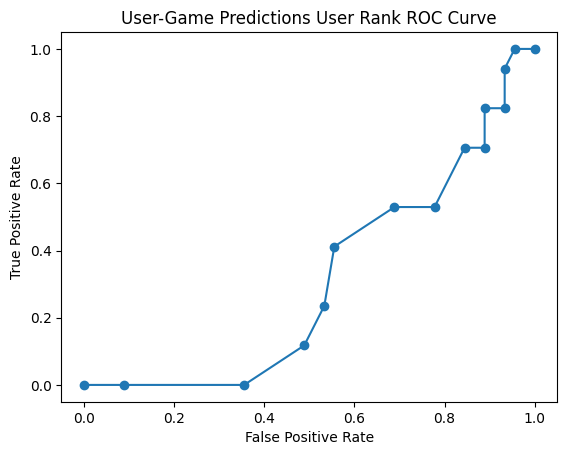

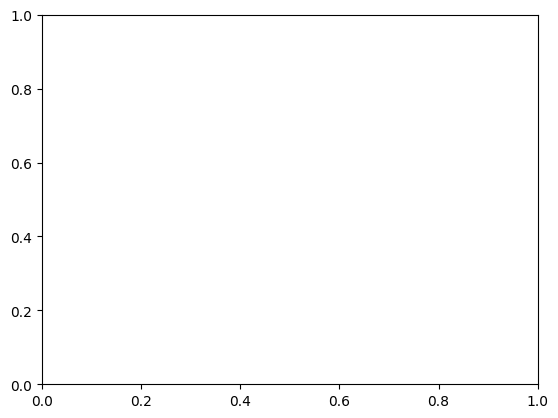

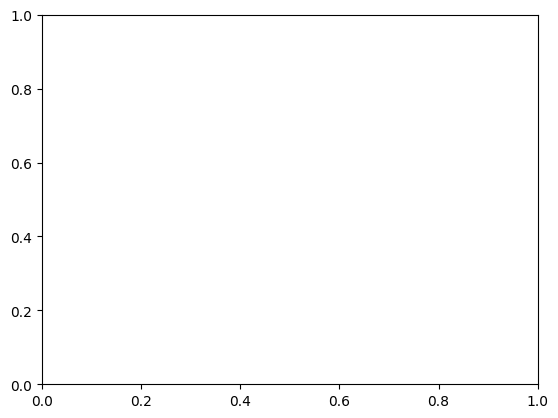

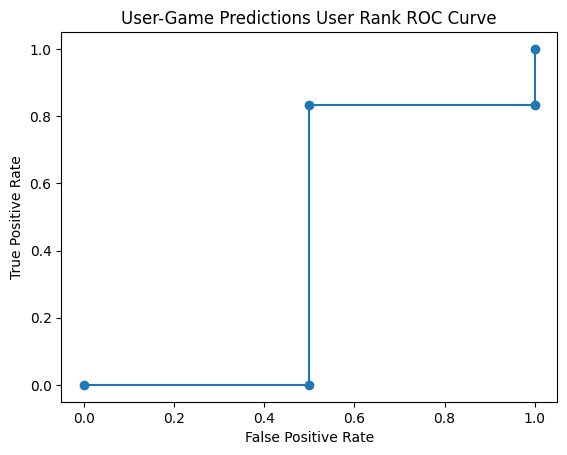

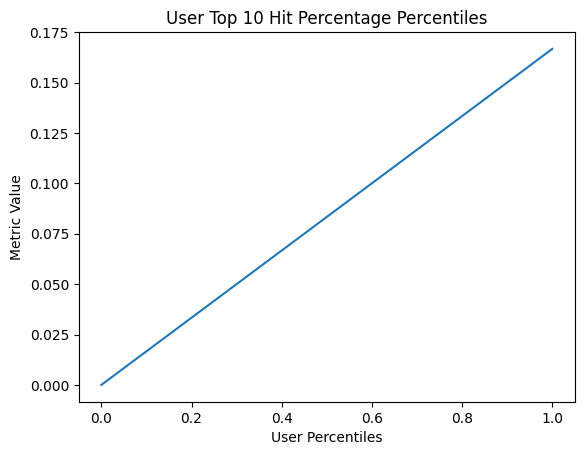

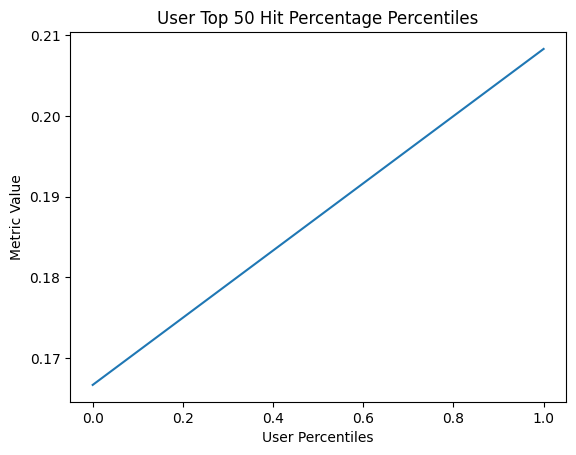

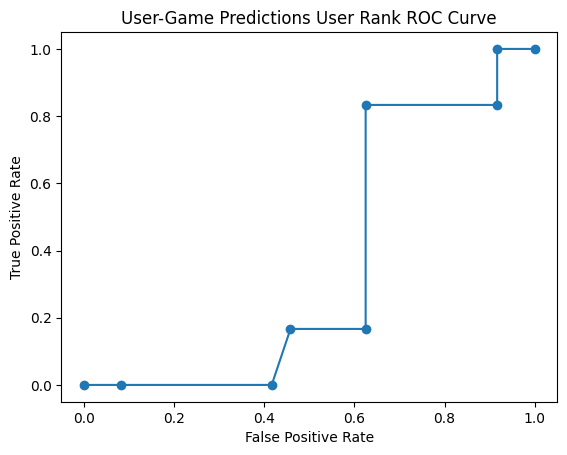

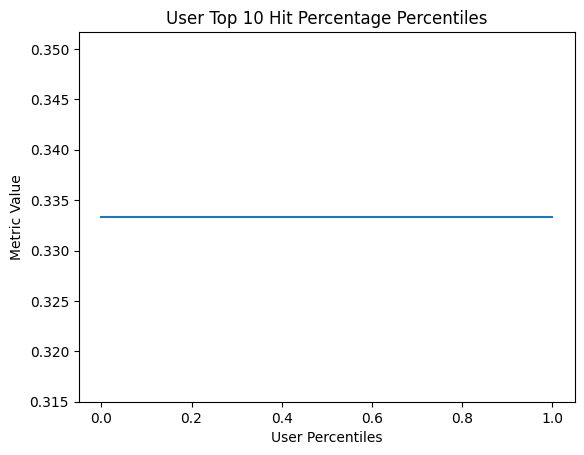

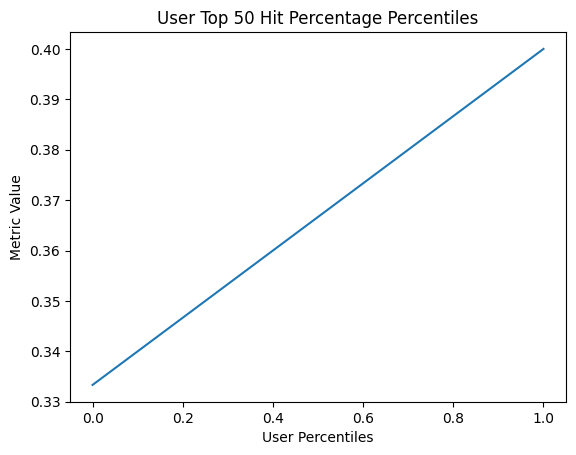

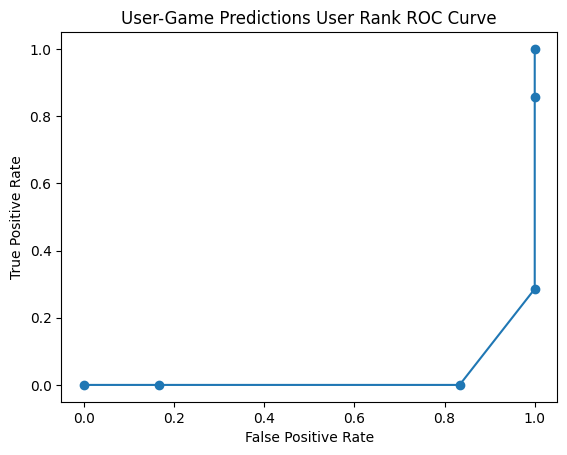

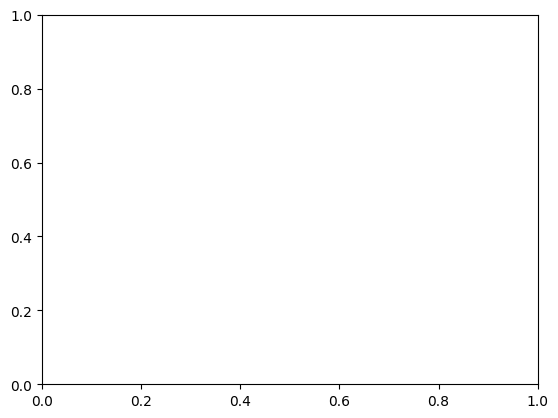

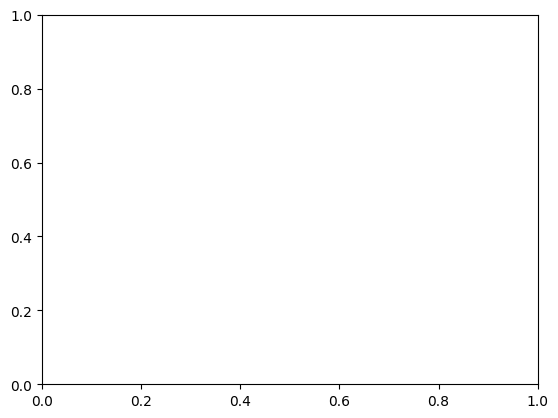

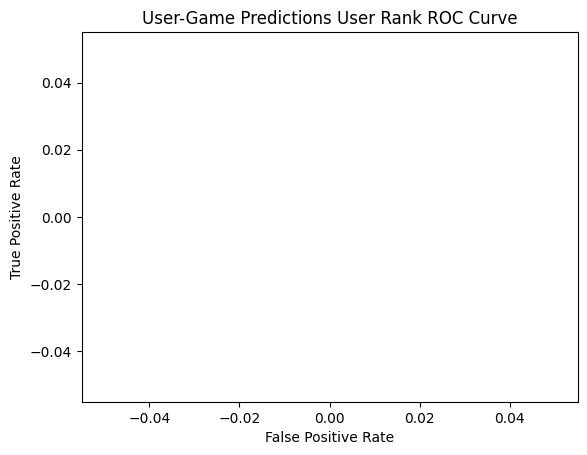

In [5]:
groups = evaluator.all_results.groupby(by=["rec_model_name", "rec_model_save_path"])
for (model_name, model_save_path), data in groups:
    print(model_name, model_save_path)
    run_eval(model_name, model_save_path)

ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

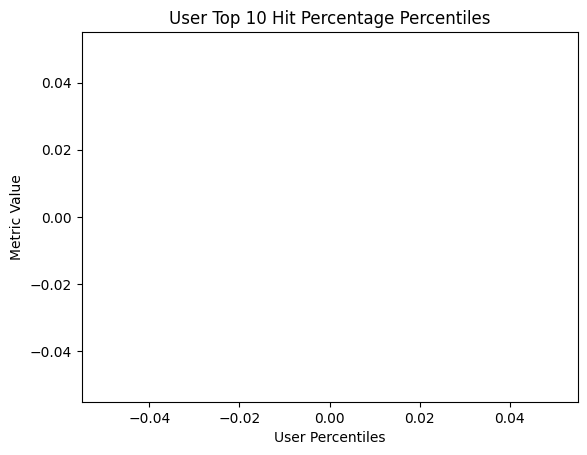

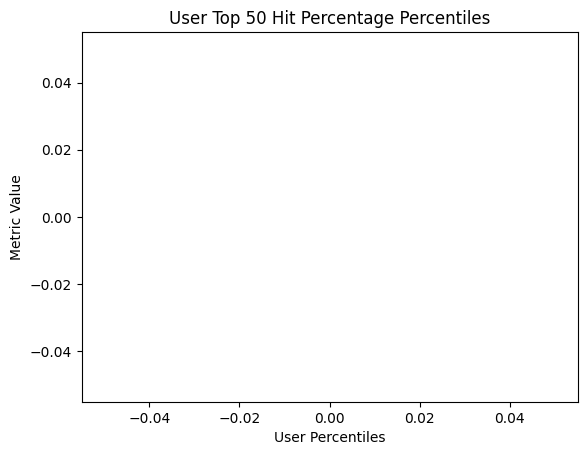

In [4]:
run_eval("game_popularity", "evaluation_test_popularity_model")

Not enough samples to get percentile figure.
Not enough samples to get percentile figure.
{'top_10_hit_percentage': 0.4444444444444444,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.43333333333333335,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': 0.5203619909502262,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}



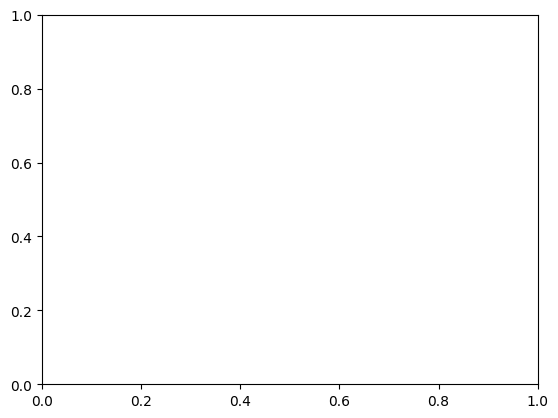

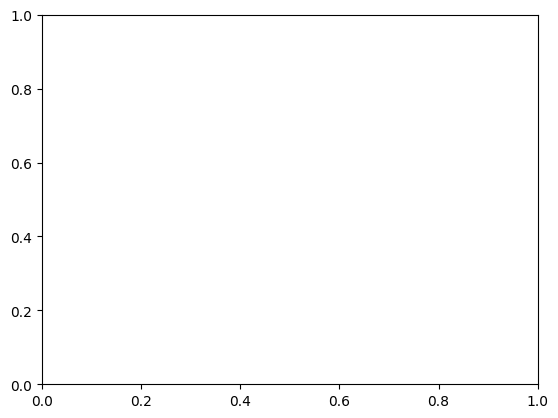

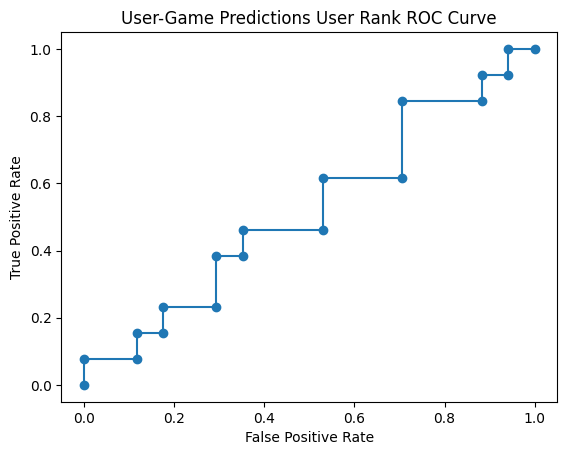

In [5]:
run_eval("common_neighbors", "evaluation_test_common_neighbors")

Not enough samples to get percentile figure.
Not enough samples to get percentile figure.
{'top_10_hit_percentage': 0.2222222222222222,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.35,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': 0.31868131868131866,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}



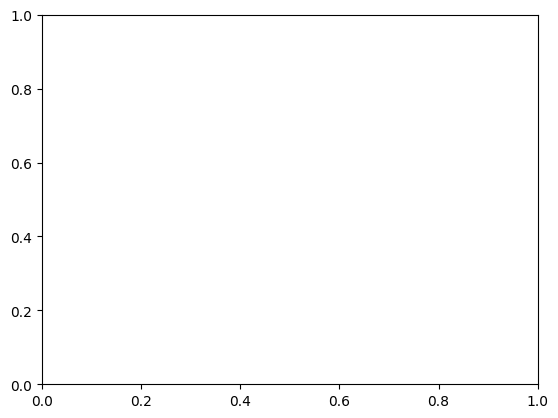

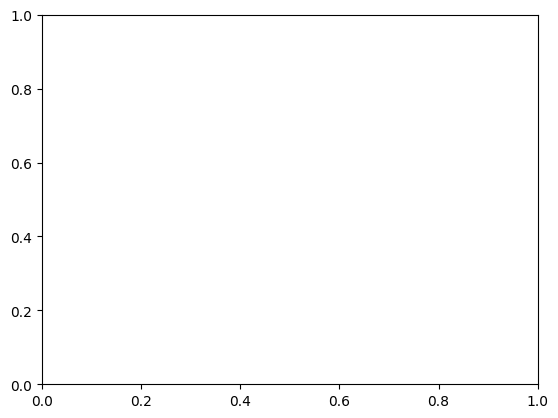

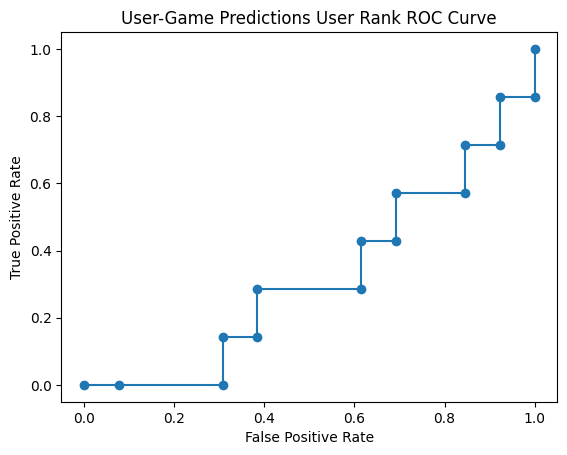

In [6]:
run_eval("common_neighbors", "evaluation_test_common_neighbors_percentile_scoring")

ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

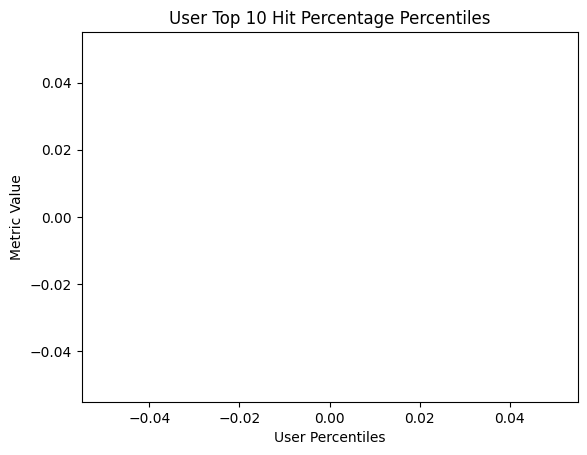

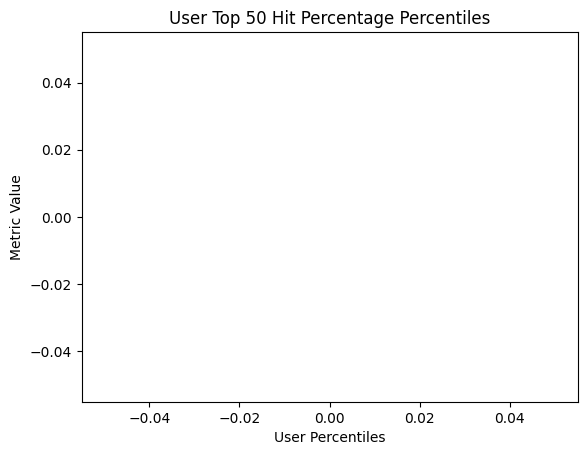

In [7]:
run_eval("common_neighbors", "evaluation_test_common_neighbors_constant_scoring")

In [ ]:
run_eval("neural_collborative_filtering_cf", "evaluation_test_cf_embed_all_except_tags")

In [ ]:
run_eval("neural_collborative_filtering_gcf", "evaluation_test_gcf_embed_all_except_tags")

In [ ]:
run_eval("neural_collborative_filtering_mlp", "evaluation_test_mlp_embed_all_except_tags")

ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

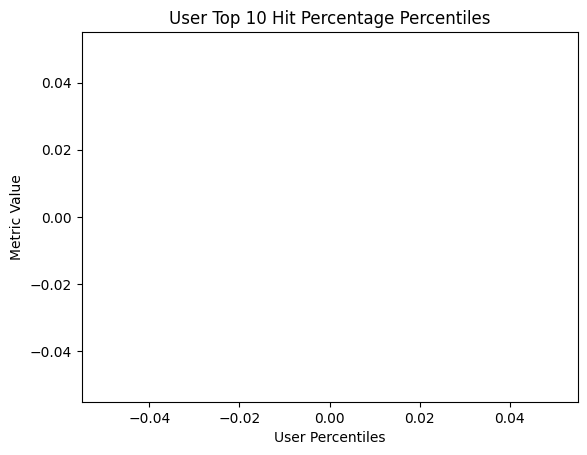

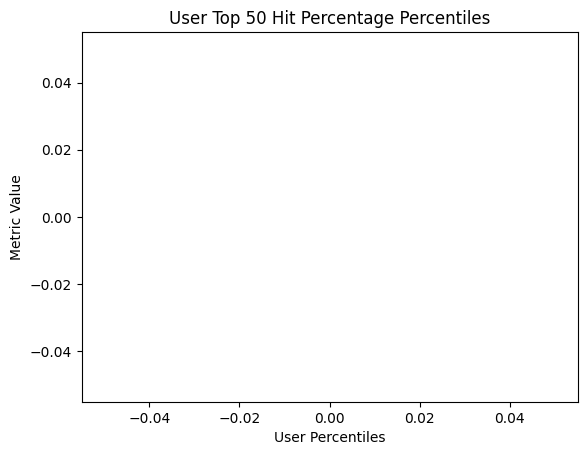

In [8]:
run_eval("neural_collborative_filtering_ncf", "evaluation_test_ncf_embed_all_except_tags")

In [9]:
df = pd.DataFrame(all_metrics)
def display_ranked_column(column_name):
    display(df.sort_values(by=column_name, ascending=False)[['model_name', 'model_save_path', column_name]])
display_ranked_column('top_10_hit_percentage')
display_ranked_column('top_50_hit_percentage')
display_ranked_column('user_rank_auc_roc')

,model_name,model_save_path,top_10_hit_percentage
1,common_neighbors,evaluation_test_common_neighbors,0.444444
0,random,evaluation_test_random_model,0.333333
2,common_neighbors,evaluation_test_common_neighbors_percentile_sc...,0.222222


,model_name,model_save_path,top_50_hit_percentage
1,common_neighbors,evaluation_test_common_neighbors,0.433333
2,common_neighbors,evaluation_test_common_neighbors_percentile_sc...,0.350000
0,random,evaluation_test_random_model,0.300000


,model_name,model_save_path,user_rank_auc_roc
0,random,evaluation_test_random_model,0.666667
1,common_neighbors,evaluation_test_common_neighbors,0.520362
2,common_neighbors,evaluation_test_common_neighbors_percentile_sc...,0.318681
